In [ ]:
from DynamicOptimizer import DynamicOptimizer
import torch.optim as optim
import torch.nn as nn

import matplotlib.pyplot as plt

In [ ]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

model = SimpleModel()

- We will use the optimizers in optim_configs.

- Learning Rate is shared, so, that that of the first optimizer is the real value.

- You can set other parameters in the list.

In [2]:
optim_configs = [
    (optim.Rprop, {'lr': 1e-6}),
    (optim.SGD, {'lr': 1e-7, 'momentum': 0.9}),
    (optim.AdamW, {'lr': 0.001}),
    (optim.RMSprop, {'lr': 0.01}),
    (optim.Adamax, {'lr': 0.002}),
    (optim.Adagrad, {'lr': 0.01}),
]

- Set frequency, with which the optimizer in the role will change

- I implemented the basic step lr decay

In [ ]:
switch_frequency = 3
lr_decay = 0.95

optimizer = DynamicOptimizer(model.parameters(), optim_configs, switch_frequency, lr_decay)

- We can simulate the optimizer.

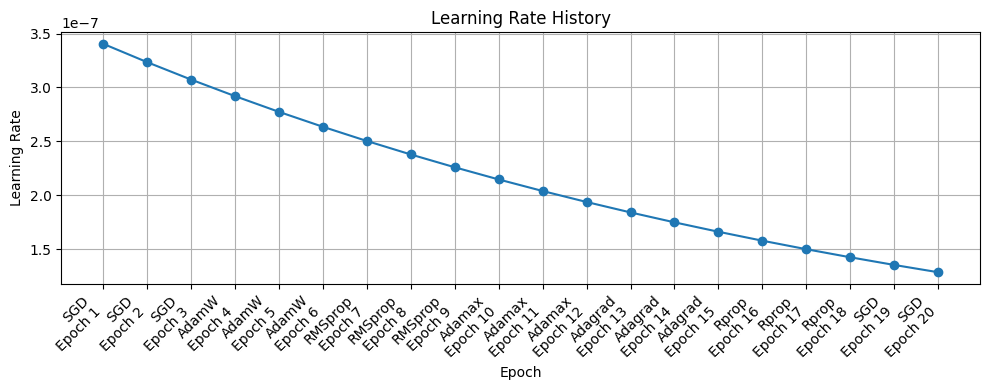

In [3]:
num_epochs = 20

lr_history = []
optimizer_names = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    with torch.no_grad():
        for param in model.parameters():
            param.grad = torch.randn_like(param)
    optimizer.step()
    optimizer.epoch_step()

    current_lr = optimizer.current_optimizer.param_groups[0]['lr']
    lr_history.append(current_lr)
    current_optimizer_name = optimizer.current_optimizer.__class__.__name__
    optimizer_names.append(current_optimizer_name)

plt.figure(figsize=(10, 4))
plt.plot(lr_history, marker='o')
plt.title('Learning Rate History')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.xticks(ticks=range(num_epochs), labels=[f"{opt}\nEpoch {i+1}" for i, opt in enumerate(optimizer_names)], rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()